#### 8) We will generate simulated data and use it to perform best subset selection

a) Create a dataset of n = 100 with a predictor, X, from a random normal distribution and a noise term

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)
x = np.random.normal(0, 1, 100)
error = np.random.normal(0, 1, 100)

In [3]:
b0 = 1.4
b1 = 0.5
b2 = -0.1
b3 = 1.2

b) generate a response variable, Y, such that Y = B0 + B1X + B2X^2 + B3X^3 + error, and the Beta terms are constants of your choice

In [4]:
df = pd.DataFrame({'X':x, 'error':error}, columns = ['X', 'error'])
for i in range(2, 11):
    col_name = 'X' + str(i)
    df[col_name] = df['X'].apply(lambda x: x**i)
df['Y'] = df.apply(lambda row: b0 + b1*row['X'] + b2*row['X2'] + b3*row['X3'] + row['error'], axis=1)

c) Use best subset selection to choose the best model from the predictors X, X^2, ..., X^10.  What is the best model according to Cp, BIC, and adjusted R^2.  Show plots to provide evidence and report the coefficients of the best model obtained.

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools

In [6]:
def model_fit(x, y):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    BIC = model.bic
    adj = model.rsquared_adj
    return BIC, adj

In [7]:
Y = df['Y']
X = df.drop(columns = ['error', 'Y'], axis=1)
k = X.shape[1]

BIC_data = []
R2_data = []
features = []
numb_features = []

for i in range(1, k + 1):
    for combo in itertools.combinations(X.columns, i):
        mod = model_fit(X[list(combo)], Y)
        BIC_data.append(mod[0])
        R2_data.append(mod[1])
        features.append(list(combo))
        numb_features.append(i)
        
bestSubset = pd.DataFrame({'BIC':BIC_data, 'R2':R2_data, 'Feats':features, '#':numb_features})

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
best_bic = bestSubset.groupby('#')['BIC'].min()
best_r2 = bestSubset.groupby('#')['R2'].max()

avg_bic = bestSubset.groupby('#')['BIC'].mean()
avg_r2 = bestSubset.groupby('#')['R2'].mean()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Best BIC')
best_bic.plot();

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Best Adjusted R^2')
best_r2.plot();

3 variables seems to be the best

In [10]:
bestGrouped = bestSubset[bestSubset.groupby('#')['BIC'].transform(min) == bestSubset['BIC']]
bestCols = bestGrouped.loc[bestGrouped['#'] == 3]
x_cols = list(bestCols['Feats'])
x_cols

[['X2', 'X3', 'X5']]

In [11]:
x_data = df[x_cols[0]]
y_data = df['Y']
model = sm.OLS(y_data, sm.add_constant(x_data)).fit()
model.params

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    1.586906
X2      -0.229213
X3       1.727621
X5      -0.080601
dtype: float64

d) Repeat c, using forward stepwise selection and using backwards selection.  How do the results compare to c?

Backwards

In [12]:
x = df.drop(columns = ['error', 'Y'])
y = df['Y']

In [13]:
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.17e-54
Time:                        14:14:31   Log-Likelihood:                -139.57
No. Observations:                 100   AIC:                             301.1
Df Residuals:                      89   BIC:                             329.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7798      0.220      8.094      0.0

In [14]:
x = x.drop(columns=['X10'])
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.18e-55
Time:                        14:14:31   Log-Likelihood:                -139.57
No. Observations:                 100   AIC:                             299.1
Df Residuals:                      90   BIC:                             325.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7861      0.195      9.176      0.0

In [15]:
x = x.drop(columns=['X3'])
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     225.8
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.46e-56
Time:                        14:14:31   Log-Likelihood:                -139.62
No. Observations:                 100   AIC:                             297.2
Df Residuals:                      91   BIC:                             320.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7853      0.194      9.219      0.0

In [16]:
x = x.drop(columns=['X6'])
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     254.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.42e-57
Time:                        14:14:31   Log-Likelihood:                -140.73
No. Observations:                 100   AIC:                             297.5
Df Residuals:                      92   BIC:                             318.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6482      0.169      9.738      0.0

In [17]:
x = x.drop(columns=['X4'])
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     300.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.36e-58
Time:                        14:14:31   Log-Likelihood:                -140.76
No. Observations:                 100   AIC:                             295.5
Df Residuals:                      93   BIC:                             313.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6291      0.142     11.504      0.0

This method keeps many more variables

In [18]:
model.params

const    1.629131
X        0.616345
X2      -0.351628
X5       1.398493
X7      -0.447058
X8       0.004660
X9       0.041387
dtype: float64

***
Forward

In [19]:
x = df.drop(columns = ['error', 'Y'])
y = df['Y']

In [20]:
for c in x.columns:
    x_data = x[c]
    model = sm.OLS(y, sm.add_constant(x_data)).fit()
    bic = model.bic
    adj = model.rsquared_adj
    print('{}: {}, {}'.format(c, bic, adj))

X: 457.2140941321456, 0.7380986215327766
X2: 592.0914908171761, -0.009027204349405515
X3: 312.4348926817268, 0.9384299223351408
X4: 592.1270502222935, -0.009386072222604902
X5: 436.0502089595571, 0.7880545006448726
X6: 590.7685542038417, 0.004233676049315571
X7: 493.5752082675984, 0.6232510101852304
X8: 587.9759650109153, 0.03165665113952765
X9: 520.5260686816937, 0.5067146744258382
X10: 584.5522401120544, 0.0642489446151221


In [21]:
keep_cols = ['X3']
cols = x.columns
x_cols = cols.drop(keep_cols)

for c in x_cols:
    cols = keep_cols + [c]
    x_data = x[cols]
    model = sm.OLS(y, sm.add_constant(x_data)).fit()
    bic = model.bic
    adj = model.rsquared_adj
    print('{}: {}, {}'.format(cols, bic, adj))

['X3', 'X']: 306.7369727015427, 0.9438850874065042
['X3', 'X2']: 313.79654117125204, 0.9397804359623894
['X3', 'X4']: 316.04803340515, 0.9384092186536857
['X3', 'X5']: 307.31602634746724, 0.9435592093654508
['X3', 'X6']: 316.8558228543487, 0.9379096799260609
['X3', 'X7']: 309.7669068568319, 0.9421588222188302
['X3', 'X8']: 317.03894903627037, 0.9377958721194256
['X3', 'X9']: 311.59880754913974, 0.9410894644009435
['X3', 'X10']: 316.9773237517707, 0.9378341937810734


BIC decreases and Adj R^2 increases when X and X3 are used

In [22]:
keep_cols = ['X3', 'X']
cols = x.columns
x_cols = cols.drop(keep_cols)

for c in x_cols:
    cols = keep_cols + [c]
    x_data = x[cols]
    model = sm.OLS(y, sm.add_constant(x_data)).fit()
    bic = model.bic
    adj = model.rsquared_adj
    print('{}: {}, {}'.format(cols, bic, adj))

['X3', 'X', 'X2']: 307.0000988427286, 0.9457097884040169
['X3', 'X', 'X4']: 309.2634530652569, 0.9444669972787478
['X3', 'X', 'X5']: 310.1851037425038, 0.9439528111227244
['X3', 'X', 'X6']: 310.28523640260113, 0.943896661474215
['X3', 'X', 'X7']: 310.7510677956349, 0.9436347048464201
['X3', 'X', 'X8']: 310.7515510412442, 0.943634432462948
['X3', 'X', 'X9']: 311.0774509251191, 0.9434504374869447
['X3', 'X', 'X10']: 310.98064727855865, 0.9435051530379741


BIC increases slightly, and Adj R^2 increases when X, X2, and X3 are used

In [23]:
keep_cols = ['X', 'X3', 'X2']
cols = x.columns
x_cols = cols.drop(keep_cols)

for c in x_cols:
    cols = keep_cols + [c]
    x_data = x[cols]
    model = sm.OLS(y, sm.add_constant(x_data)).fit()
    bic = model.bic
    adj = model.rsquared_adj
    print('{}: {}, {}'.format(cols, bic, adj))

['X', 'X3', 'X2', 'X4']: 309.9787349697433, 0.9460234385724502
['X', 'X3', 'X2', 'X5']: 308.10092647399046, 0.947027557804949
['X', 'X3', 'X2', 'X6']: 310.1715561155734, 0.9459192599412887
['X', 'X3', 'X2', 'X7']: 308.6038209152274, 0.9467604913694819
['X', 'X3', 'X2', 'X8']: 310.21577523098244, 0.9458953406283634
['X', 'X3', 'X2', 'X9']: 309.0154876575666, 0.9465408702753223
['X', 'X3', 'X2', 'X10']: 310.1967599008514, 0.9459056278298557


BIC and adj R^2 increase slightly when adding X5 to the model.  R^2 increases by 0.0013

In [24]:
keep_cols = ['X', 'X3', 'X2', 'X5']
cols = x.columns
x_cols = cols.drop(keep_cols)

for c in x_cols:
    cols = keep_cols + [c]
    x_data = x[cols]
    model = sm.OLS(y, sm.add_constant(x_data)).fit()
    bic = model.bic
    adj = model.rsquared_adj
    print('{}: {}, {}'.format(cols, bic, adj))

['X', 'X3', 'X2', 'X5', 'X4']: 312.31489447941203, 0.9466730459810082
['X', 'X3', 'X2', 'X5', 'X6']: 312.5357608729921, 0.9465551344953703
['X', 'X3', 'X2', 'X5', 'X7']: 312.16553647662136, 0.946752634603696
['X', 'X3', 'X2', 'X5', 'X8']: 312.6260199964898, 0.9465068738516706
['X', 'X3', 'X2', 'X5', 'X9']: 312.193544706514, 0.9467377188704651
['X', 'X3', 'X2', 'X5', 'X10']: 312.6686968804014, 0.9464840397802351


BIC increases significantly more than prior, and R^2 decreases.  The best model has X, X2, X3, and X5 as its features.

In [25]:
x_data = df[['X', 'X2', 'X3', 'X5']]
model = sm.OLS(y, sm.add_constant(x_data)).fit()
model.params

const    1.577226
X        0.230710
X2      -0.215664
X3       1.577513
X5      -0.061077
dtype: float64

e) Now fit a lasso model to the simulated data, using the same predictors.  Use cross validation to select the optimal lambda. Create plots of the cross validation error as a function of lambda.  Report the resulting coefficient estimates and discuss the results obtained.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.model_selection import cross_val_score


x = df.drop(columns = ['error', 'Y'])
y = df['Y']
lambdas = [1e-20, 1e-15, 1e-10, .00001, .0001, .001, .01, .1, 1, 5]
score_dict = {}
for alpha in lambdas:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, x, y, scoring = 'neg_mean_squared_error', cv=10)
    score_dict[alpha] = (scores.mean(), scores.std())

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.79754915579858, tolerance: 0.1625647600549571
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.44484997575065, tolerance: 0.19320369713617133
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.155199860945864, tolerance: 0.12531217379019594
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.105578731050244, tolerance: 0.12531217379019594
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.109409027862164, tolerance: 0.18486198808246898
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.49358213186664, tolerance: 0.17258136729624773
  positive)
C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

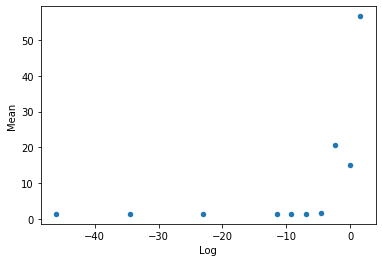

In [27]:
scoreDF = pd.DataFrame.from_dict(score_dict, orient='index', columns = ['Mean', 'Std'])
scoreDF.reset_index(inplace=True)
scoreDF.rename(columns={'index':'lambda'}, inplace=True)
scoreDF['Log'] = np.log(scoreDF['lambda'])
scoreDF['Mean'] = scoreDF['Mean'].apply(lambda x: x*-1)
scoreDF.plot(x='Log', y='Mean', kind='scatter');

In [28]:
best = scoreDF['Mean'].min()
bestLambda = scoreDF[scoreDF['Mean'] == best]['lambda'].values[0]
lasso = Lasso(alpha = bestLambda)
lasso.fit(x, y)
list(lasso.coef_)

C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.978041392685185, tolerance: 0.1992748843178194
  positive)


[-0.03573039198900109,
 -0.7832556523336743,
 2.043446447655669,
 0.3202593567440675,
 -0.2053968103872179,
 -0.04369417413855734,
 -0.005900438241495714,
 -0.002538286028620221,
 0.003286277398447138,
 0.0007630924101340264]

These coefficients aren't anything close to the actual coefficients.  The lasso seemed to be best as lambda approached 0 (normal linear regression), which shouldn't be the case.

f) Now generate a response vector Y according to Y = B0 + B7X^7 + error and perform best subset selection and the lasso.  Discuss results

In [29]:
df2 = df.copy()
b7 = 2.5
df2['Y'] = df.apply(lambda row: b0 + b7*row['X7'] + row['error'], axis=1)

Best Subset

In [30]:
Y = df2['Y']
X = df2.drop(columns = ['error', 'Y'], axis=1)
k = X.shape[1]

BIC_data = []
R2_data = []
features = []
numb_features = []

for i in range(1, k + 1):
    for combo in itertools.combinations(X.columns, i):
        mod = model_fit(X[list(combo)], Y)
        BIC_data.append(mod[0])
        R2_data.append(mod[1])
        features.append(list(combo))
        numb_features.append(i)
        
bestSubset = pd.DataFrame({'BIC':BIC_data, 'R2':R2_data, 'Feats':features, '#':numb_features})

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
best_bic = bestSubset.groupby('#')['BIC'].min()
best_r2 = bestSubset.groupby('#')['R2'].max()

avg_bic = bestSubset.groupby('#')['BIC'].mean()
avg_r2 = bestSubset.groupby('#')['R2'].mean()

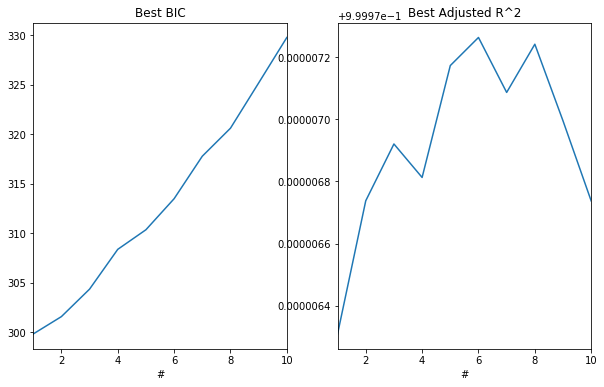

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Best BIC')
best_bic.plot();

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Best Adjusted R^2')
best_r2.plot();

In [33]:
bestGrouped = bestSubset[bestSubset.groupby('#')['BIC'].transform(min) == bestSubset['BIC']]
bestCols = bestGrouped.loc[bestGrouped['#'] == 1]
x_cols = list(bestCols['Feats'])
x_cols

[['X7']]

In [34]:
x_data = df2[x_cols[0]]
y_data = df2['Y']
model = sm.OLS(y_data, sm.add_constant(x_data)).fit()
model.params

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    1.482050
X7       2.499915
dtype: float64

In [35]:
bestGrouped = bestSubset[bestSubset.groupby('#')['R2'].transform(min) == bestSubset['R2']]
bestCols = bestGrouped.loc[bestGrouped['#'] == 6]
x_cols = list(bestCols['Feats'])
x_cols

[['X', 'X2', 'X4', 'X6', 'X8', 'X10']]

Almost exactly what the estimated coefficient was.  Interestingly, the best using adjusted r-squared does not include the explanatory variable

***
Lasso

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.model_selection import cross_val_score


x = df2.drop(columns = ['error', 'Y'])
y = df2['Y']
lasso = Lasso()
parameters = {'alpha':[1e-20, 1e-15, 1e-10, .00001, .0001, .001, .01, .1, 1, 5]}
lasso_regressor = gscv(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-44.947516411665156


In [37]:
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])
lasso.fit(x, y)
list(lasso.coef_)

[2.018706918672408,
 -2.5079469838045223,
 -6.479325081614762,
 2.378695623086458,
 5.178688675390131,
 -0.6141909855572703,
 1.0614225756582887,
 -0.0011466160442400485,
 0.12769437312223936,
 0.010015991689610567]

Again, these results are not anywhere close to what they should be.  Likely doing lasso incorrectly here?

#### 9)  We will predict the number of applicatoins received using the other variables in the college data set

a) Split the data set into a training and testing set

In [38]:
import pandas as pd
import os

path = os.path.join(os.getcwd(), 'College.csv')
college = pd.read_csv(path)
college.rename(columns={'Unnamed: 0':'College'}, inplace = True)

In [39]:
from sklearn.model_selection import train_test_split as tts

college['Private_IO'] = college['Private'].apply(lambda x: 1 if x=='Yes' else 0)
colDrop = ['Private']
college.drop(columns = colDrop, inplace=True)

y_col = 'Apps'
forTT = college.drop(columns = [y_col, 'College'])
x_cols = forTT.columns
x_train, x_test, y_train, y_test = tts(college[x_cols], college[y_col], random_state = 0)

b) Fit a linear model using least squares on the training set, and report the test error obtained

In [40]:
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error as mse

model = linreg()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse(y_test, y_pred)

1022430.0889255457

c) Fit a ridge regression model on the training set, with lambda chosen by cross-validation.  Report the test error obtained

In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha':[30, 35, 40, 45, 50, 55, 60]}
ridge_regressor = gscv(ridge, params, scoring = 'neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_ * -1)

{'alpha': 40}
1498298.063694811


In [42]:
model = Ridge(alpha = ridge_regressor.best_params_['alpha'])
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse(y_test, y_pred)

1017555.9270697526

d) Fit a lasso model on the training set, using CV to choose lambda.  Report the test error obtained and the number of non-zero coefficient estimates

In [43]:
lasso = Lasso()
params = {'alpha':[150, 160, 165, 170, 175, 180, 185, 190, 195, 200]}
lasso_regressor = gscv(lasso, params, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_ * -1)

{'alpha': 180}
1497496.549591384


C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
model = Lasso(alpha = lasso_regressor.best_params_['alpha'])
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse(y_test, y_pred)

1019713.8097130827

In [45]:
list(model.coef_)

[1.6298424015335762,
 -1.0240542069962795,
 51.27756631920167,
 -13.353063411600663,
 0.08567855128586946,
 0.058143459881948585,
 -0.10419435612206884,
 0.1535757007611232,
 -0.011155953377862854,
 -0.01862001020990704,
 -7.696251372107008,
 -0.30574971308694227,
 0.0,
 -0.0,
 0.050072342084938305,
 5.975325833094307,
 -0.0]

All but 3 variables are non-zero, with an additional 5 variables with a coefficient less than 0.1 (absolute value)

f) e, but use PLS

In [46]:
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.model_selection import cross_val_predict

In [47]:
pls = PLS()

params = {'n_components':range(1, len(x_train.columns))}
pls_regressor = gscv(pls, params, scoring = 'neg_mean_squared_error', cv=5)
pls_regressor.fit(x_train, y_train)

print(pls_regressor.best_params_)
print(pls_regressor.best_score_ * -1)

{'n_components': 9}
1502225.1394760227


C:\Users\joepo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
model = PLS(n_components = pls_regressor.best_params_['n_components'])
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse(y_test, y_pred)

1022578.3870499638

g) Comment on these 5 approaches and their accuracies

* LogReg - 1022430
* Ridge - 1017555
* Lasso - 1019713
* PCR - 1022578

Ridge and lasso improved on the initial model, ridge outperforming lasso by a small margin (0.002%).  PCR was about the same, as the initial model